<a href="https://colab.research.google.com/github/IgnacioPardo/SNN/blob/main/SNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simple Neural Network

Simple Red Neuronal (Perceptrón) para la materia Tecnologías Exponenciales - TIC

Inspirado en https://github.com/jonasbostoen/simple-neural-network

### Librerias

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import HTML, display
import tabulate
import networkx as nx
from random import random as rand
import itertools

In [ ]:
np.random.seed(1)

### Funciones

Estas son las funciones de activacion, que permiten hacer que el modelo no sea lineal. Y hace que los valores esten entre 0 y 1.

In [ ]:
def sigmoid(x):
    return 1 / ( 1 + np.exp(-x) )

# sigmoid = lambda x : 1 / ( 1 + np.exp(-x) )

def sigmoid_derivative(x):
    return x * (1 - x)

# sigmoid_derivative = lambda x : x * (1 - x)


Sigmoid Function
$$\operatorname{f}(x)=\frac{1}{1+e^{(-x)}}$$

Sigmoid Derivative Function
$$\operatorname{f'}(x)=x \times (1-x)$$

#### Visualización Función Sigmoide

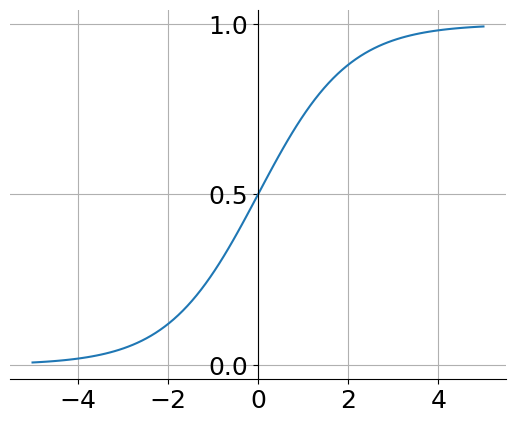

In [ ]:
x = np.linspace(-5,5,100)
y = sigmoid(x)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

# Move left y-axis and bottim x-axis to centre, passing through (0,0)
ax.spines['left'].set_position('center')

# Eliminate upper and right axes
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

plt.plot(x, y)
plt.locator_params(axis='y', nbins=3)
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)
plt.grid()

## Setup

### Values

#### Training Values

Aqui se define las dimensiones de la red. En la variable training input, se define la cantidad de neuronas de entrada. En este caso hay 4 parametros. Y en la variable de training otputs se define la cantidad de salidas. En este caso hay dos neuronas de salida.

In [ ]:
#Chocolates
#Columnas: Tiene dulce de leche, granisado, caro, artesanal
training_inputs = np.array([
    [1,1,0,0],
    [0,0,1,1],
    [1,0,0,1],
    [1,0,0,0],
    [0,1,1,0],
    [0,1,1,1],
    [0,0,0,0],
    [1,1,1,1],
    [1,0,1,0],
    [1,0,1,1],
    [1,1,1,0],
    [1,1,0,1]
])

training_outputs = np.array([
    #Si me gusta 1, si no 0
    [1,0,1,1,0,0,0,1,0,1,0,1],
    #Si a Chordi le gusta 1, si no 0
    [0,1,0,0,1,1,1,0,0,0,0,1]
    ]).T

display(training_inputs)
display(training_outputs)

array([[1, 1, 0, 0],
       [0, 0, 1, 1],
       [1, 0, 0, 1],
       [1, 0, 0, 0],
       [0, 1, 1, 0],
       [0, 1, 1, 1],
       [0, 0, 0, 0],
       [1, 1, 1, 1],
       [1, 0, 1, 0],
       [1, 0, 1, 1],
       [1, 1, 1, 0],
       [1, 1, 0, 1]])

array([[1, 0],
       [0, 1],
       [1, 0],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 0],
       [1, 0],
       [0, 0],
       [1, 1]])

In [ ]:
training_values = np.concatenate((training_inputs.T, training_outputs.T)).T
table = lambda arr : display(HTML(tabulate.tabulate(arr, tablefmt='html')))
table(training_values)

1,1,0,0,1,0
0,0,1,1,0,1
1,0,0,1,1,0
1,0,0,0,1,0
0,1,1,0,0,1
0,1,1,1,0,1
0,0,0,0,0,1
1,1,1,1,1,0
1,0,1,0,0,0
1,0,1,1,1,0
1,1,1,0,0,0


#### Synaptic weights

In [ ]:
n = training_inputs.shape[1]
m = training_outputs.shape[1]
synaptic_weights = 2 + np.random.random((n, m)) - 1

synaptic_weights

array([[1.417022  , 1.72032449],
       [1.00011437, 1.30233257],
       [1.14675589, 1.09233859],
       [1.18626021, 1.34556073]])

## Training

Para obtener un resultado a partir de los inputs y los synaptic weights se realiza la siguiente función:

$$\sum_{i=0}^{n}{x_iw_i}$$

Y se le aplica la función sigmoide para normalizar al rango 0, 1

Por ejemplo, si nuestros inputs $x_i$ son `[1, 1, 1]` y nuestros pesos sinapticos $w_i$ son `[[11.30926442], [-0.20511667], [-5.4500033]]`

Nos resulta la cuenta
$$[1 \times 11.30926442] + [1 \times (-0.20511667)] + [1 \times (-5.4500033)] = 5.6541444499999995$$

Con la función sigmoide es facil ver como $$\operatorname{sigmoid}(5.65) \approx 1$$

In [ ]:
eval_NN = lambda x, w: sigmoid(np.dot(x, w))

En este caso esta utilisando foward propagation para poder definir los pesos. Porque empiesa con los valores de training y calcula los outputs. Luego calcula el error.

In [ ]:
# 50000 epochs
for iteration in range(50000):

    # Arranca con los valores de training
    input_layer = training_inputs

    # Genera un output haciendo la suma de los valores de input multiplicados por su peso sinaptico, y aplicandole la función sigmoide para normalizar a -1, 1
    outputs = eval_NN(input_layer, synaptic_weights)

    # Calculo el error
    error = training_outputs - outputs

    # Ajusto los pesos en funcion al error y al resultado obtenido
    adjustments = error * sigmoid_derivative(outputs)
    synaptic_weights += np.dot(input_layer.T, adjustments)

In [ ]:
print('Synaptic weights after training')
print(synaptic_weights)

print('Outputs after training: ')
print(outputs)

Synaptic weights after training
[[ 10.41150515 -22.36074421]
 [ -0.17998725  13.4002233 ]
 [-15.61206623  -8.71368015]
 [ 10.41147769  13.4002233 ]]
Outputs after training: 
[[9.99963984e-01 1.28365535e-04]
 [5.48314406e-03 9.90865613e-01]
 [9.99999999e-01 1.28365535e-04]
 [9.99969916e-01 1.94479855e-10]
 [1.38551582e-07 9.90865613e-01]
 [4.58410548e-03 9.99999986e-01]
 [5.00000000e-01 5.00000000e-01]
 [9.93509597e-01 1.37351404e-02]
 [5.48329378e-03 3.19580602e-14]
 [9.94572889e-01 2.10964785e-08]
 [4.58423076e-03 2.10964785e-08]
 [9.99999999e-01 9.88338034e-01]]


## Eval

In [ ]:
table(training_values)

1,1,0,0,1,0
0,0,1,1,0,1
1,0,0,1,1,0
1,0,0,0,1,0
0,1,1,0,0,1
0,1,1,1,0,1
0,0,0,0,0,1
1,1,1,1,1,0
1,0,1,0,0,0
1,0,1,1,1,0
1,1,1,0,0,0


In [ ]:
large = lambda x : display(HTML('<p style="font-size: 50px; color: #66D148">'+str(x)+'</p>'))

In [ ]:
a = 1 #@param {type:"integer"}
b = 1 #@param {type:"integer"}
c = 0 #@param {type:"integer"}
d = 0 #@param {type:"integer"}


input_layer = np.array([a, b, c, d])
res = sigmoid(np.dot(input_layer, synaptic_weights))
for i in res:
  display(i)

  thresh = 0.5
  out = 0 if i < thresh else 1

  large(out)

0.9999639842390856

0.00012836288216935772

#Bonus
a) Primero, tener una sola matriz para guardar los weights no seria suficiente. Para lograr esto podriamos tener un array de matrices para guardar los distintos pesos. Es necesario tener una matriz con los biases.
Para poder tener mas de una capa de neuronas lo que se puede reutilisar el codigo para calcular una capa. Para lograr esto los outputs de la primera capa de neuronas se puede usar como inputs de la segunda capa. De esta manera podriamos tener mas de una capa.

b) Se suele utilisar en las redes neuronales en la utltima capa, en modelos de clasificacion. Es util porque en casos de clasificacion, es util que el modelo solamente caiga en dos valores.
Por ejemplo, un modelo que clasifica imagenes y se encarga de decir si hay un perro en la imagen, no es util que el modelo me diga que hay 0.34 perro. En estos casos es preferible que lo defina a 0. Tampoco tendria sentido que detecte 0.34 perro. Porque el perro solamente puede estar o no estar, no hay punto intermedio.